# 实验6 图像的形态学处理

## 6-1：采用形态学操作提取二值图像的轮廓线

### 实验要求

1. 采用形态学提取连通区域算法（人机交互指定种子点）求出所有的连通域；
2. 采用结构元提取二值图像的边缘；

$$
\beta{(A)} = A - (A \ominus B)
$$

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

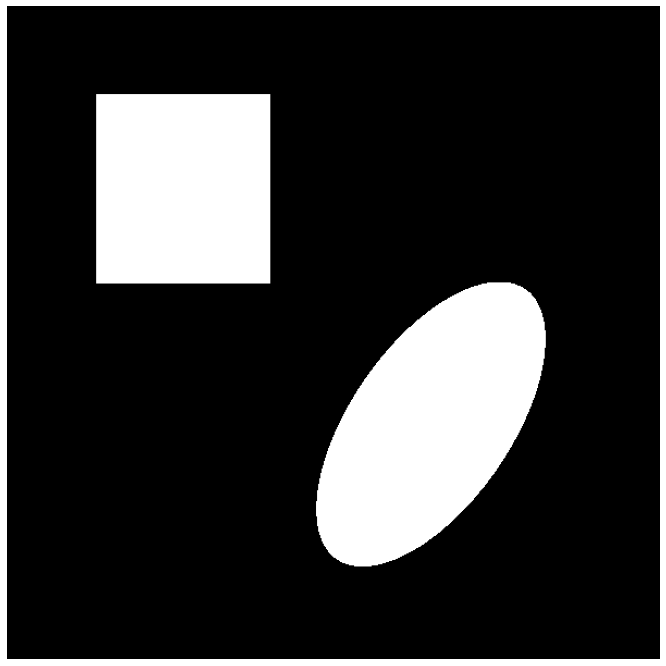

In [2]:
# Read the image
image = mpimg.imread('imgs/Lab6/binary-objects.tif')
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()

In [3]:
def dilate(image, kernel):
    rows, cols = image.shape
    krows, kcols = kernel.shape

    result = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            if image[i, j] > 0:
                for m in range(krows):
                    for n in range(kcols):
                        ni, nj = i + m - krows // 2, j + n - kcols // 2
                        if 0 <= ni < rows and 0 <= nj < cols:
                            result[ni, nj] = 255

    return result


kernel = np.ones((3, 3), dtype=np.uint8)
dilated = dilate(image, kernel)

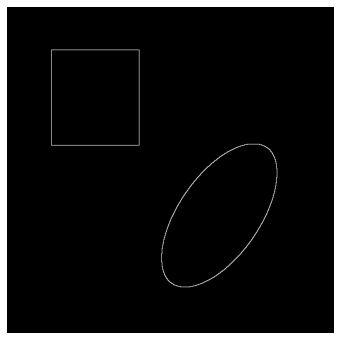

In [4]:
# If you want to see whether the dilation is effective, we can have a look at the edge of the image
plt.figure(figsize=(6, 6))
plt.imshow(dilated - image, cmap='gray')
plt.axis("off")
plt.show()

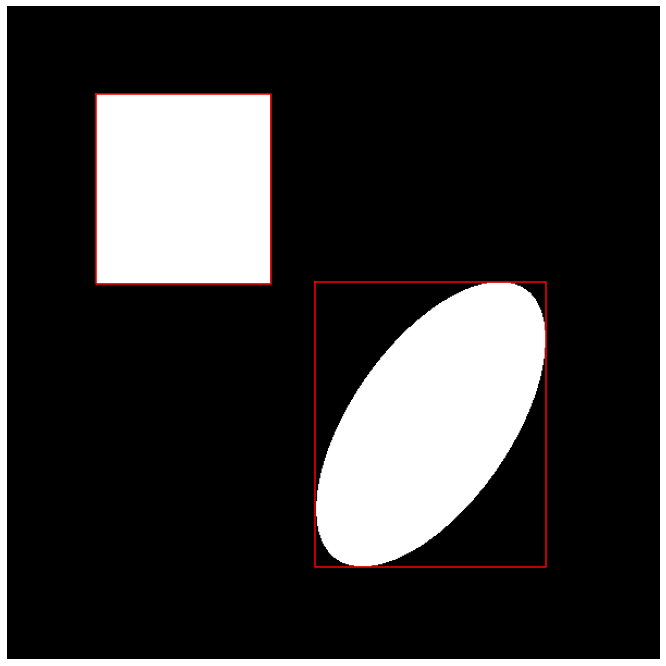

In [5]:
# Get all the connected components
def get_all_connected_components(image):
    rows, cols = image.shape
    visited = np.zeros_like(image)
    components = []

    for i in range(rows):
        for j in range(cols):
            if image[i, j] > 0 and visited[i, j] == 0:
                component = []
                queue = [(i, j)]
                while len(queue) > 0:
                    ni, nj = queue.pop(0)
                    if visited[ni, nj] == 0:
                        component.append((ni, nj))
                        visited[ni, nj] = 1
                        for m in range(-1, 2):
                            for n in range(-1, 2):
                                if (
                                    0 <= ni + m < rows
                                    and 0 <= nj + n < cols
                                    and image[ni + m, nj + n] > 0
                                ):
                                    queue.append((ni + m, nj + n))
                components.append(component)

    return components


components = get_all_connected_components(dilated)
# For all the connected components, we can draw a bounding box to show them
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap="gray")
plt.axis("off")
for component in components:
    minx, miny = np.min(component, axis=0)
    maxx, maxy = np.max(component, axis=0)
    plt.plot([miny, maxy, maxy, miny, miny], [minx, minx, maxx, maxx, minx], "r")
plt.show()

## 6-2：处理含噪声的指纹图像

### 实验要求

采用形态学操作处理噪声指纹图像

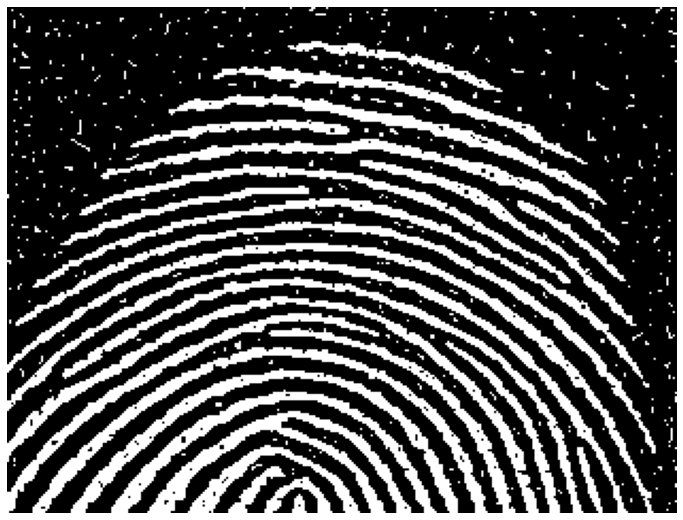

In [6]:
# Read the image
image = mpimg.imread("imgs/Lab6/fingerprint-noisy.tif")
image = np.mean(image, axis=2)
plt.figure(figsize=(12, 12))
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [7]:
# Implement the erosion
def erode(image, kernel):
    rows, cols = image.shape
    krows, kcols = kernel.shape

    result = np.zeros_like(image)

    for i in range(rows):
        for j in range(cols):
            if image[i, j] > 0:
                for m in range(krows):
                    for n in range(kcols):
                        ni, nj = i + m - krows // 2, j + n - kcols // 2
                        if 0 <= ni < rows and 0 <= nj < cols:
                            if np.sum(image[ni - 1 : ni + 2, nj - 1 : nj + 2]) < 255 * 7:
                                result[i, j] = 0
                            else:
                                result[i, j] = 255

    return result


erosion_kernel = np.ones((3, 3), dtype=np.uint8)

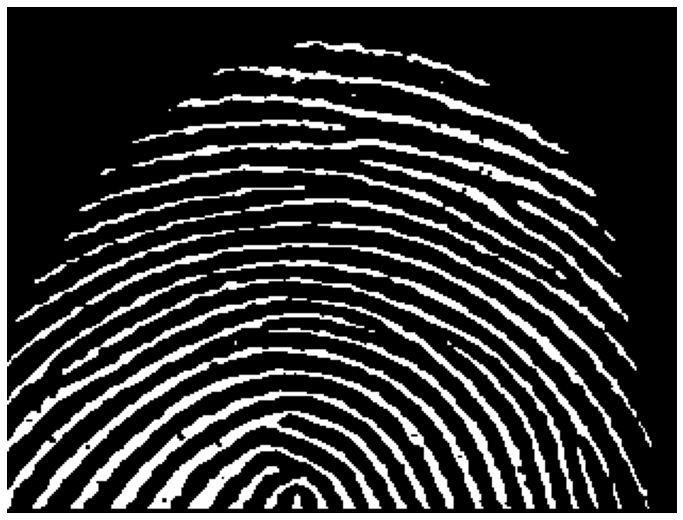

In [8]:
eroded = erode(image, erosion_kernel)
# Show the result
plt.figure(figsize=(12, 12))
plt.imshow(eroded, cmap="gray")
plt.axis("off")
plt.show()

In [9]:
def opening(image, kernel):
    return dilate(erode(image, kernel), kernel)


def closing(image, kernel):
    return erode(dilate(image, kernel), kernel)

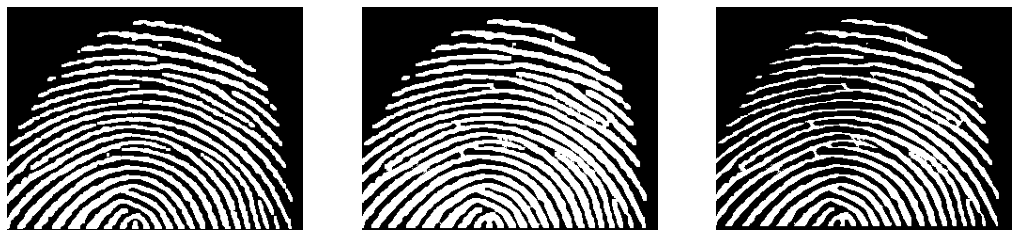

In [10]:
# Apply the opening operation and the closing operation
opened = opening(image, kernel)
closed = closing(opened, erosion_kernel)
fin = erode(closed, erosion_kernel)

# Show the result
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(opened, cmap="gray")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(closed, cmap="gray")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(fin, cmap="gray")
plt.axis("off")
plt.show()